In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import NearestNDInterpolator

In [2]:
import intake
cat = intake.open_catalog("../catalog.yaml")

In [3]:
run = cat.ICON["ngc2009"]

In [28]:
data = run.atm_2d_ml_R02B06.to_dask()
grid = cat.ICON.grids[data.uuidOfHGrid].to_dask()

In [29]:
import numpy as np

lon = np.deg2rad(np.linspace(-30, 60, 90*10))
lat = np.deg2rad(np.linspace(33, 72, (72-33)*10))
lon2, lat2 = np.meshgrid(lon, lat)

points_icon = np.vstack((grid.clon, grid.clat)).T
data_sample = data['ts'].sel(time="2020-01-31", method="nearest")

nn_interpolation = NearestNDInterpolator(points_icon, data_sample.values)
interpolated_nn = nn_interpolation((lon2, lat2))

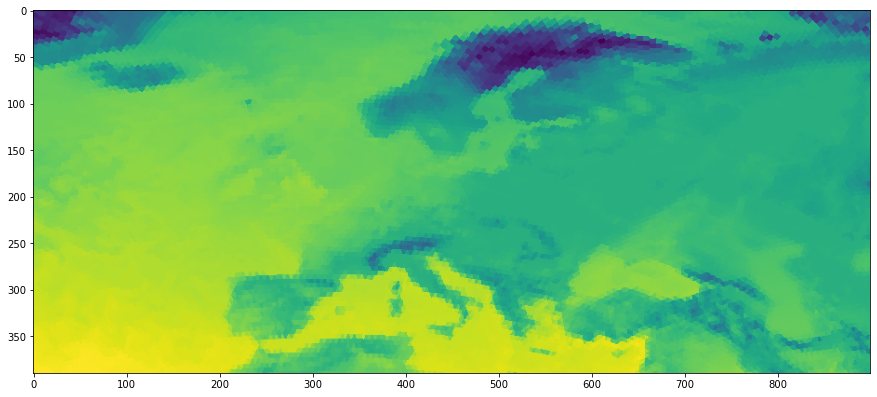

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))